# Predicting how weather affects the prices of electricity

In [1410]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1411]:
#import data
prices = pd.read_csv('')
weather = pd.read_csv('')

In [1412]:
prices.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [1413]:
weather.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


- As changing the temperature hourly is neither efficient nor possible we calculate daily averages

In [1414]:
# calculate day's average price and total load
prices['date'] = prices['time'].str[:10]
prices=prices[['date', 'total load actual','price actual']]
grouped_prices = prices.groupby("date")
mean_price = grouped_prices.mean()
prices = mean_price.reset_index()

In [1415]:
#calculate day's average temperature
weather['date'] = weather['dt_iso'].str[:10]
weather['temp_celcius']=weather['temp']-273.15
weather=weather[['date', 'temp','temp_celcius']]
grouped_weather = weather.groupby("date")
mean_weather = grouped_weather.mean()
weather = mean_weather.reset_index()

In [1416]:
#merge
result = pd.merge(weather, prices, on="date", how="outer")
result

,date,temp,temp_celcius,total load actual,price actual
0,2015-01-01,276.928845,3.778845,23896.750000,62.148750
1,2015-01-02,277.897585,4.747585,27251.291667,69.327083
2,2015-01-03,278.817864,5.667864,25110.666667,65.706667
3,2015-01-04,279.630031,6.480031,27112.625000,58.264167
4,2015-01-05,279.032920,5.882920,22559.444444,74.568750
...,...,...,...,...,...
1456,2018-12-27,280.702033,7.552033,28532.208333,73.029583
1457,2018-12-28,281.067398,7.917398,28637.750000,69.457083
1458,2018-12-29,281.231583,8.081583,26636.750000,62.544583
1459,2018-12-30,280.159274,7.009274,25263.916667,64.524583


In [1417]:
# .Info to show types, nulls, and count
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               1461 non-null   object 
 1   temp               1461 non-null   float64
 2   temp_celcius       1461 non-null   float64
 3   total load actual  1461 non-null   float64
 4   price actual       1461 non-null   float64
dtypes: float64(4), object(1)
memory usage: 68.5+ KB


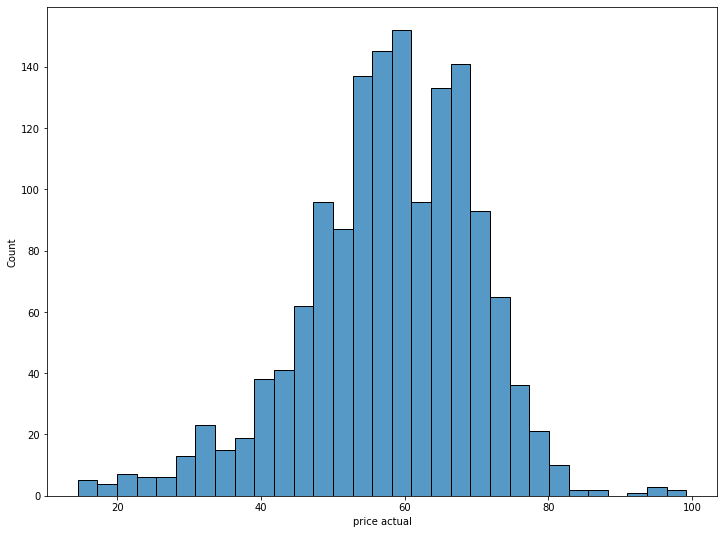

In [1418]:
plt.figure(figsize=(12,9))
sns.histplot(result,x='price actual');

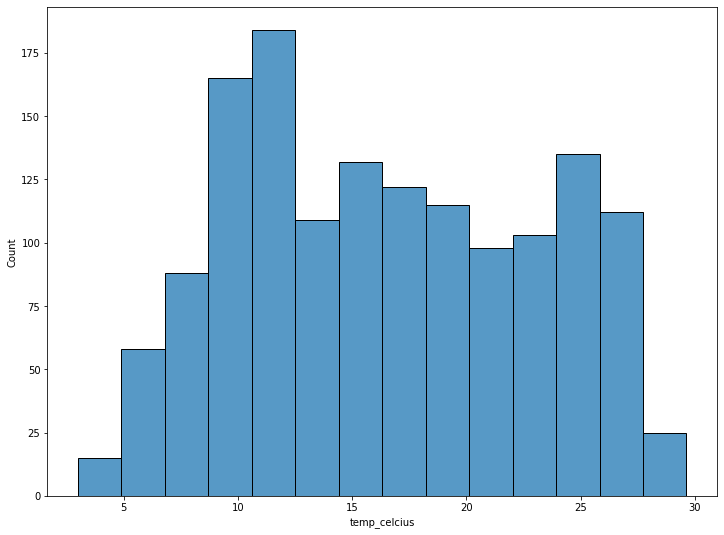

In [1419]:
plt.figure(figsize=(12,9))
sns.histplot(result,x='temp_celcius');

<function matplotlib.pyplot.show(*args, **kw)>

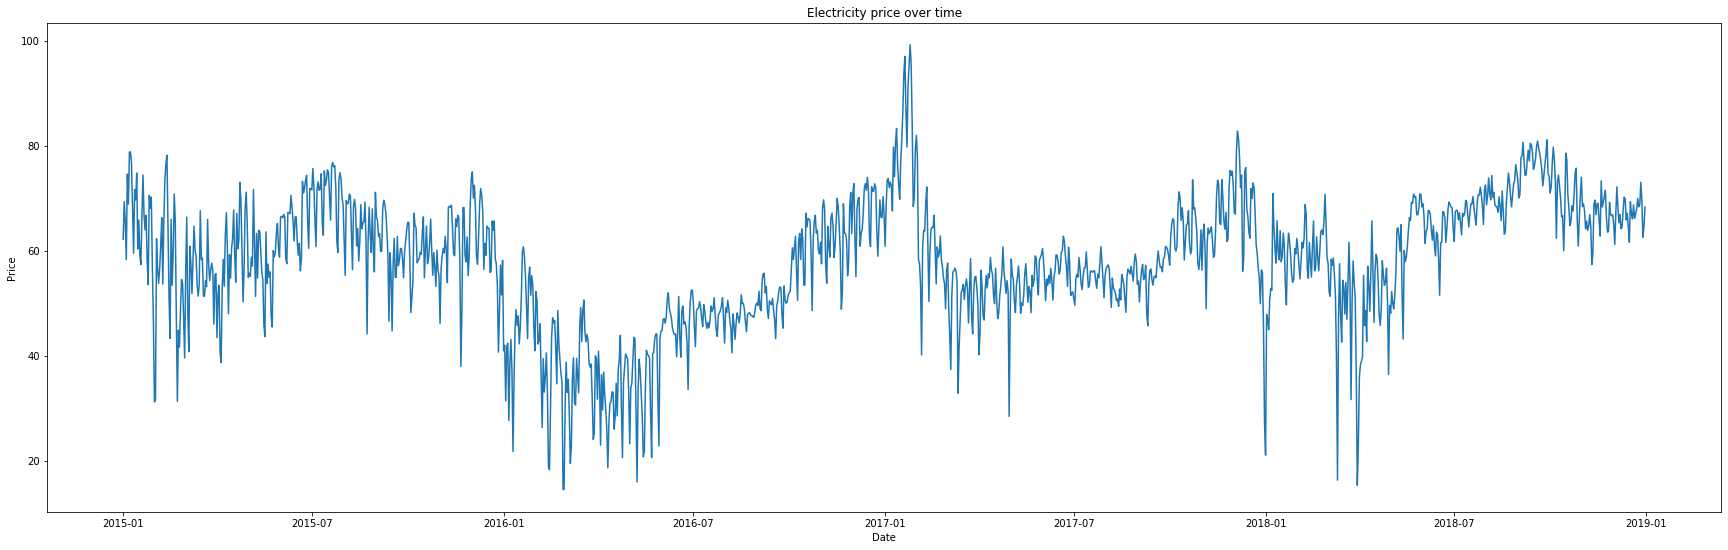

In [1451]:
#Date and price
result['date']=pd.to_datetime(result['date'], format='%Y.%m.%d')
fig, ax = plt.subplots(figsize=(30,9))
ax.plot(result['date'], result['price actual'])
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.set_title("Electricity price over time")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

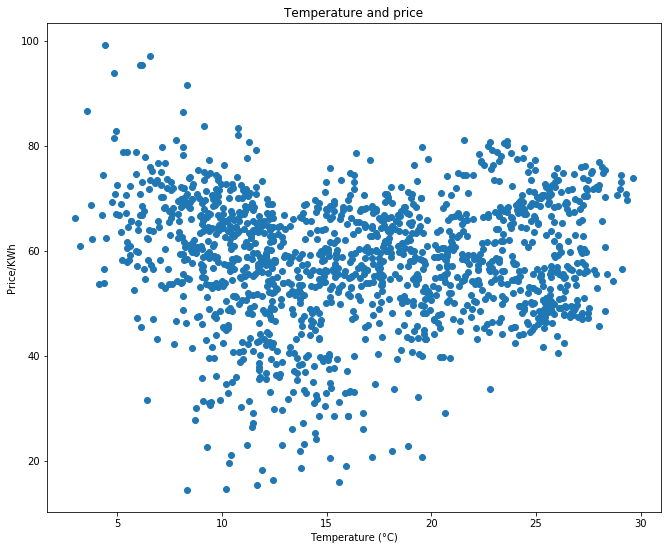

In [1421]:
#Temperature and price
fig, ax = plt.subplots(figsize=(11,9))
ax.scatter(result['temp_celcius'], result['price actual'])
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Price/KWh")
ax.set_title("Temperature and price")
plt.show

## Polynomial regression

In [1422]:
xp = result["temp_celcius"].values
yp = result["price actual"].values

In [1423]:
def plot_regression_poly(x, y, d):
    
    min_x, max_x = x.min(), x.max()
    xs = 2*(x - min_x)/(max_x - min_x)-1  # standardize to range [-1,1]
    X = np.array([xs**i for i in range(d,-1,-1)]).T
    
    theta = np.linalg.solve(X.T @ X, X.T @ y)
    
    xt0 = np.linspace(min_x-1, max_x+1, 400)
    
    # create scaled test dataset
    xt = 2* (xt0 - min_x)/(max_x - min_x) -1
    Xt = np.array([xt**i for i in range(d,-1,-1)]).T
    yt = Xt @ theta
    
    # Plot results
    plt.figure(figsize = (8,6))
    plt.scatter(x, y, marker="x")
    ylim = plt.ylim()
    plt.plot(xt0, yt, 'C1')
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Price/KWh)")
    plt.xlim([min_x-2, max_x+2])
    plt.ylim(ylim)
    print(theta[:4])

[14.78431547 -1.24162582 54.43349891]


Text(0.5, 1.0, 'Quadratic polynomial regression')

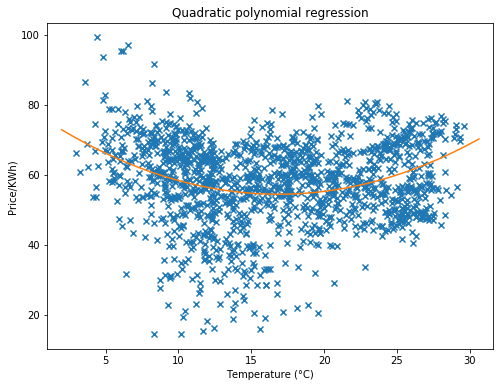

In [1424]:
plot_regression_poly(x = xp, y=yp, d = 2)
plt.title("Quadratic polynomial regression")

[-14.5065642   15.61522743   5.10519658  54.50075988]


Text(0.5, 1.0, 'Cubic polynomial regression')

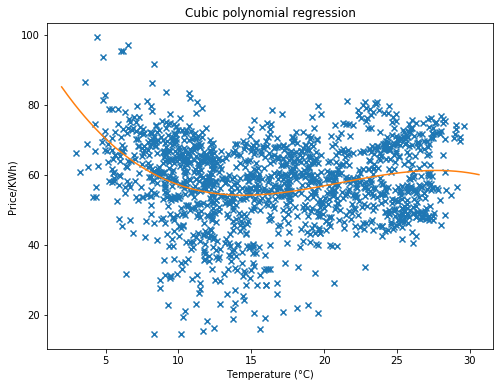

In [1425]:
plot_regression_poly(x = xp, y=yp, d = 3)
plt.title("Cubic polynomial regression")

Cross-validation

In [1426]:
# split the data, 70-30% split
x_train, x_test, y_train, y_test = train_test_split(result["temp_celcius"], result["price actual"], test_size=0.3,random_state=1234)

In [1427]:
def ls_poly(x, y, d):
    
    # Create polynomial features
    min_x, max_x = x.min(), x.max()
    xs = 2*(x - min_x)/(max_x - min_x)-1  # standardize to range [-1,1]
    X = np.array([xs**i for i in range(d,-1,-1)]).T
    
    # Implement polynomial regression using least squares (we use the nomal equations as derived in the lecture)
    theta = np.linalg.solve(X.T @ X, X.T @ y)
    
    return theta

Text(0, 0.5, 'Mean squared error')

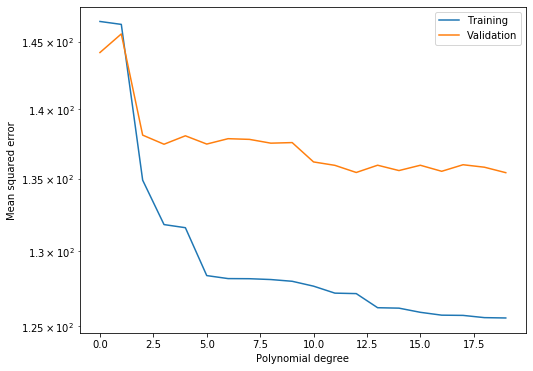

In [1428]:
min_x_train, max_x_train = x_train.min(), x_train.max()
x_train = 2*(x_train - min_x_train)/(max_x_train - min_x_train) - 1
x_test = 2*(x_test - min_x_train)/(max_x_train - min_x_train) - 1

def poly_feat(x, degree):
    return np.array([x**i for i in range(degree,-1,-1)]).T
    

err_train = []
err_cv = []
for i in range(20):
    theta = ls_poly(x_train, y_train, i)
    err_train.append(((poly_feat(x_train,i) @ theta - y_train)**2).mean())
    err_cv.append(((poly_feat(x_test,i) @ theta - y_test)**2).mean())

plt.figure(figsize = (8,6))    
plt.semilogy(range(20), err_train, range(20), err_cv)
plt.legend(["Training", "Validation"])
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared error")

- Optimal polynomial degree seems to be around 2
- Mean squared error around 138

## Seasonal linear regression

- Spring - from March to June
- Summer - from June to September
- Autumn - from September to December
- Winter - from December to March

In [1429]:
#Divide the data into seasons. 
result['month']=result['date'].apply(lambda x: x.month)
result_spring=result[(result['month']>=4)&(result['month']<=6)]
result_summer=result[(result['month']>=7)&(result['month']<=9)]
result_autumn=result[(result['month']>=10)&(result['month']<=12)]
result_winter=result[(result['month']>=1)&(result['month']<=3)]

In [1430]:
result_winter

,date,temp,temp_celcius,total load actual,price actual,month
0,2015-01-01,276.928845,3.778845,23896.750000,62.148750,1
1,2015-01-02,277.897585,4.747585,27251.291667,69.327083,1
2,2015-01-03,278.817864,5.667864,25110.666667,65.706667,1
3,2015-01-04,279.630031,6.480031,27112.625000,58.264167,1
4,2015-01-05,279.032920,5.882920,22559.444444,74.568750,1
...,...,...,...,...,...,...
1181,2018-03-27,286.049274,12.899274,30370.500000,53.884583,3
1182,2018-03-28,288.314083,15.164083,29186.041667,51.084583,3
1183,2018-03-29,286.743033,13.593033,25911.916667,36.708750,3
1184,2018-03-30,284.827984,11.677984,24299.958333,15.312083,3


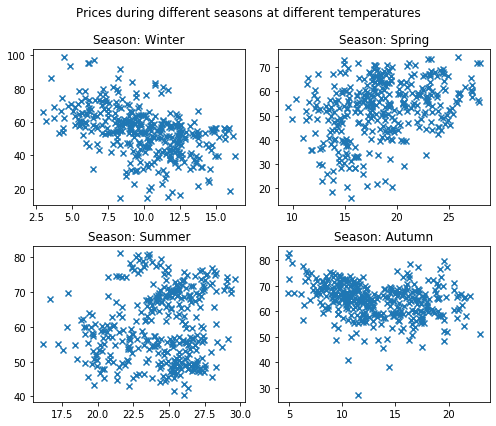

In [1431]:
# Simple data to display in various forms
#x = np.linspace(0, 2 * np.pi, 400)
#y = np.sin(x ** 2)

fig, axarr = plt.subplots(2, 2, figsize=(7,6))
fig.suptitle("Prices during different seasons at different temperatures")

axarr[0, 0].scatter(result_winter['temp_celcius'], result_winter['price actual'], marker="x")
axarr[0, 0].set_title('Season: Winter')
axarr[0, 1].scatter(result_spring['temp_celcius'], result_spring['price actual'], marker="x")
axarr[0, 1].set_title('Season: Spring')
axarr[1, 0].scatter(result_summer['temp_celcius'], result_summer['price actual'], marker="x")
axarr[1, 0].set_title('Season: Summer')
axarr[1, 1].scatter(result_autumn['temp_celcius'], result_autumn['price actual'], marker="x")
axarr[1, 1].set_title('Season: Autumn')

fig.tight_layout()
fig.subplots_adjust(top=0.88)

plt.show()

- Generally, the prices seems to be bigger if the temperature is either very low or very high. This seems plausible, as the demand of electricity is also higher during these seasons; in the summer due to air conditioning and in the winter due to heating.

In [1432]:
linear_model = LinearRegression(fit_intercept=True, normalize=False)

In [1433]:
X = result_winter["temp_celcius"].values.reshape((-1,1))
y = result_winter["price actual"]

X1 = result_spring["temp_celcius"].values.reshape((-1,1))
y1 = result_spring["price actual"]

X2 = result_summer["temp_celcius"].values.reshape((-1,1))
y2 = result_summer["price actual"]

X3 = result_autumn["temp_celcius"].values.reshape((-1,1))
y3 = result_autumn["price actual"]


xp = result_winter['temp_celcius']
yp = result_winter['price actual']

xp1 = result_spring['temp_celcius']
yp1 = result_spring['price actual']

xp2 = result_summer['temp_celcius']
yp2 = result_summer['price actual']

xp3 = result_autumn['temp_celcius']
yp3 = result_autumn['price actual']




### Season: Winter

In [1434]:
linear_model.fit(X, y)
print(linear_model.coef_, linear_model.intercept_)

[-2.3936705] 78.05230532996043


/Users/monsu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


[-2.3936705] 78.05230532996043


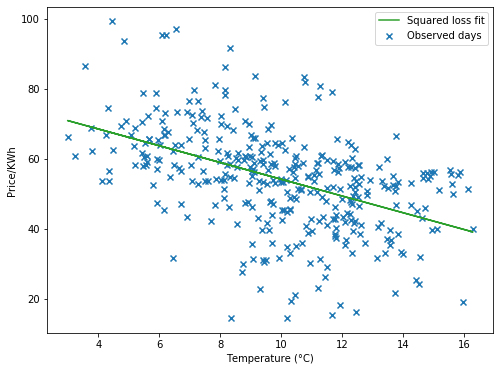

In [1435]:
lr = LinearRegression()
lr.fit(xp.values.reshape(-1,1), yp)
model_pred = lr.predict(xp.values.reshape(-1,1))


fig,ax = plt.subplots(figsize = (8,6))

ax.scatter(xp, yp, marker="x")
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Price/KWh")

ax.plot(xp, model_pred, c='C2')
ax.legend(['Squared loss fit','Observed days'])
print(lr.coef_, lr.intercept_)

In [1436]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_true = result_winter["price actual"]
y_pred = linear_model.predict(result_winter["temp_celcius"].values.reshape((-1,1)))

In [1437]:
print("Mean Squared Error:",mean_squared_error(y_pred, y_true),"€/KWh^2")
print("Root Mean Squared Error:",mean_squared_error(y_pred, y_true)**0.5,"€/KWh")
print("Mean Absolute Error:",mean_absolute_error(y_pred, y_true),"€/KWh")

Mean Squared Error: 164.00168773171418 €/KWh^2
Root Mean Squared Error: 12.806314369548883 €/KWh
Mean Absolute Error: 9.788389810577142 GW


### Season: Spring

In [1438]:
linear_model.fit(X1, y1)
print(linear_model.coef_, linear_model.intercept_)

[0.98648434] 34.48863616430474


/Users/monsu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


[0.98648434] 34.48863616430474


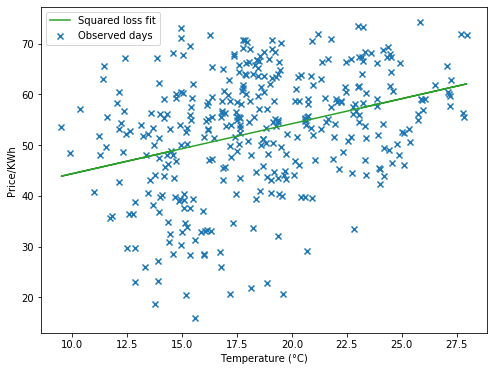

In [1439]:
lr = LinearRegression()
lr.fit(xp1.values.reshape(-1,1), yp1)
model_pred = lr.predict(xp1.values.reshape(-1,1))


fig,ax = plt.subplots(figsize = (8,6))

ax.scatter(xp1, yp1, marker="x")
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Price/KWh")

ax.plot(xp1, model_pred, c='C2')
ax.legend(['Squared loss fit','Observed days'])
print(lr.coef_, lr.intercept_)

In [1440]:
y_true = result_spring["price actual"]
y_pred = linear_model.predict(result_spring["temp_celcius"].values.reshape((-1,1)))

In [1441]:
print("Mean Squared Error:",mean_squared_error(y_pred, y_true),"€/KWh^2")
print("Root Mean Squared Error:",mean_squared_error(y_pred, y_true)**0.5,"€/KWh")
print("Mean Absolute Error:",mean_absolute_error(y_pred, y_true),"€/KWh")

Mean Squared Error: 124.76774309109393 €/KWh^2
Root Mean Squared Error: 11.169948213447274 €/KWh
Mean Absolute Error: 8.969027666400454 €/KWh


### Season: Summer

In [1442]:
linear_model.fit(X2, y2)
print(linear_model.coef_, linear_model.intercept_)

[0.43937029] 49.39131629941736


/Users/monsu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


[0.43937029] 49.39131629941736


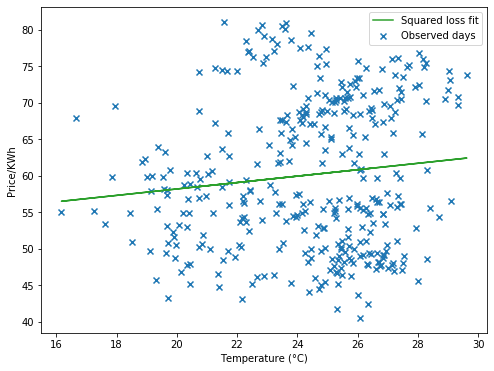

In [1443]:
lr = LinearRegression()
lr.fit(xp2.values.reshape(-1,1), yp2)
model_pred = lr.predict(xp2.values.reshape(-1,1))


fig,ax = plt.subplots(figsize = (8,6))

ax.scatter(xp2, yp2, marker="x")
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Price/KWh")

ax.plot(xp2, model_pred, c='C2')
ax.legend(['Squared loss fit','Observed days'])
print(lr.coef_, lr.intercept_)

In [1444]:
y_true = result_summer["price actual"]
y_pred = linear_model.predict(result_summer["temp_celcius"].values.reshape((-1,1)))

In [1445]:
print("Mean Squared Error:",mean_squared_error(y_pred, y_true),"(€/KWh)^2")
print("Root Mean Squared Error:",mean_squared_error(y_pred, y_true)**0.5,"€/KWh")
print("Mean Absolute Error:",mean_absolute_error(y_pred, y_true),"€/KWh")

Mean Squared Error: 100.7626446369632 (€/KWh)^2
Root Mean Squared Error: 10.038059804412564 €/KWh
Mean Absolute Error: 8.72986242823869 €/KWh


### Season: Autumn

In [1446]:
linear_model.fit(X3, y3)
print(linear_model.coef_, linear_model.intercept_)

[-0.47256385] 70.48520988270194


/Users/monsu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


[-0.47256385] 70.48520988270194


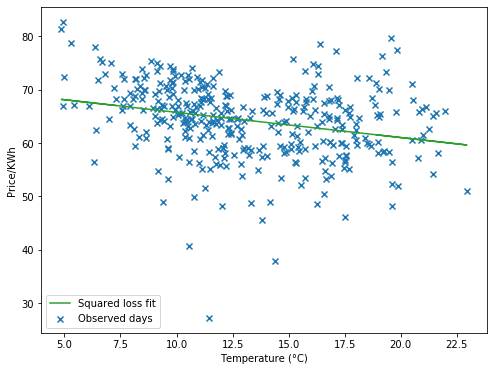

In [1447]:
lr = LinearRegression()
lr.fit(xp3.values.reshape(-1,1), yp3)
model_pred = lr.predict(xp3.values.reshape(-1,1))


fig,ax = plt.subplots(figsize = (8,6))

ax.scatter(xp3, yp3, marker="x")
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Price/KWh")

ax.plot(xp3, model_pred, c='C2')
ax.legend(['Squared loss fit','Observed days'])
print(lr.coef_, lr.intercept_)

In [1448]:
y_true = result_autumn["price actual"]
y_pred = linear_model.predict(result_autumn["temp_celcius"].values.reshape((-1,1)))

In [1449]:
print("Mean Squared Error:",mean_squared_error(y_pred, y_true),"(€/KWh)^2")
print("Root Mean Squared Error:",mean_squared_error(y_pred, y_true)**0.5,"€/KWh")
print("Mean Absolute Error:",mean_absolute_error(y_pred, y_true),"€/KWh")

Mean Squared Error: 44.10901602875492 (€/KWh)^2
Root Mean Squared Error: 6.641461889430287 €/KWh
Mean Absolute Error: 4.993520717011499 €/KWh
